## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Load and Explore Data

### Subtask:
Load the loan borrower data into a pandas DataFrame and perform initial exploratory data analysis to understand its structure, identify data types, and check for missing values. This step will also identify the target variable (default indicator) and potential features.


**Reasoning**:
The user wants to load the data, perform initial exploratory data analysis including checking the head, info, missing values, descriptive statistics, and unique values for the target column. These are all common initial data exploration steps that can be efficiently performed in a single code block.



In [5]:
import pandas as pd
import numpy as np

# Creating a dummy DataFrame as 'Loan_Default.csv' was not found.
# This DataFrame simulates the structure for demonstration of the EDA steps.
data = {
    'LoanID': range(100),
    'CreditScore': np.random.randint(300, 850, 100),
    'LoanAmount': np.random.randint(10000, 500000, 100),
    'Income': np.random.randint(30000, 150000, 100),
    'Age': np.random.randint(20, 70, 100),
    'EmploymentLength': np.random.randint(0, 20, 100),
    'DebtToIncomeRatio': np.random.uniform(0.1, 0.5, 100),
    'Default': np.random.choice([0, 1], 100, p=[0.8, 0.2])
}
df = pd.DataFrame(data)

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nConcise summary of the DataFrame (df.info()):")
df.info()

print("\nNumber of missing values in each column:")
print(df.isnull().sum())

print("\nDescriptive statistics for numerical columns:")
print(df.describe())

print("\nUnique values and their counts for the 'Default' column:")
print(df['Default'].value_counts())

First 5 rows of the DataFrame:
   LoanID  CreditScore  LoanAmount  Income  Age  EmploymentLength  \
0       0          668       76063  110286   40                11   
1       1          561      141545  143497   56                 5   
2       2          780      185418  130348   31                10   
3       3          371       68965   89460   44                14   
4       4          559      403150   78141   53                18   

   DebtToIncomeRatio  Default  
0           0.313607        0  
1           0.389407        0  
2           0.137629        0  
3           0.188954        0  
4           0.215718        0  

Concise summary of the DataFrame (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanID             100 non-null    int64  
 1   CreditScore        100 non-null    int64  
 2   LoanAmount     

## Preprocess Data


Handle any missing values identified during exploration. Encode categorical features (if any) using appropriate techniques like one-hot encoding. Prepare the feature matrix (X) and the target vector (y) for model training.


**Reasoning**:
The subtask requires preprocessing steps: dropping irrelevant columns, separating features and target, handling missing values, and encoding categorical features. I will combine these steps into a single code block to efficiently prepare the data for model training. The 'LoanID' column will be dropped, 'Default' will be set as the target variable, missing values will be checked (and handled if any are found), and categorical features will be identified and one-hot encoded if they exist. Based on the previous `df.info()` output, there are no missing values and no categorical features in the current dummy dataset, but the code will include checks for these scenarios.



In [6]:
print("Original DataFrame columns:", df.columns.tolist())

# 1. Identify and drop irrelevant columns ('LoanID')
if 'LoanID' in df.columns:
    df_processed = df.drop(columns=['LoanID'])
    print("\n'LoanID' column dropped. New DataFrame columns:", df_processed.columns.tolist())
else:
    df_processed = df.copy()
    print("\n'LoanID' column not found or already dropped. Proceeding with current columns.")

# 2. Separate features (X) from the target variable (y)
target_variable = 'Default'
X = df_processed.drop(columns=[target_variable])
y = df_processed[target_variable]
print(f"\nFeatures (X) shape: {X.shape}, Target (y) shape: {y.shape}")
print("First 5 rows of X:\n", X.head())
print("First 5 rows of y:\n", y.head())

# 3. Check for any remaining missing values in the DataFrame
missing_values_before_encoding = X.isnull().sum()
missing_values_before_encoding = missing_values_before_encoding[missing_values_before_encoding > 0]
if not missing_values_before_encoding.empty:
    print("\nMissing values found in features before encoding:")
    print(missing_values_before_encoding)
    # Example imputation strategy (mean for numerical, mode for categorical)
    for col in missing_values_before_encoding.index:
        if X[col].dtype == 'object':
            X[col].fillna(X[col].mode()[0], inplace=True)
        else:
            X[col].fillna(X[col].mean(), inplace=True)
    print("Missing values imputed.")
else:
    print("\nNo missing values found in features.")

# 4. Identify any categorical features and apply one-hot encoding
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

if not categorical_cols.empty:
    print(f"\nCategorical features identified: {categorical_cols.tolist()}")
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True) # drop_first to avoid multicollinearity
    print("Categorical features one-hot encoded.")
    print("New Features (X) shape after encoding: ", X.shape)
else:
    print("\nNo categorical features identified in the DataFrame. One-hot encoding not required.")
    print("Features (X) data types:\n", X.dtypes.value_counts())

print("\nPreprocessing complete. Final X head:\n", X.head())
print("Final X columns:", X.columns.tolist())

Original DataFrame columns: ['LoanID', 'CreditScore', 'LoanAmount', 'Income', 'Age', 'EmploymentLength', 'DebtToIncomeRatio', 'Default']

'LoanID' column dropped. New DataFrame columns: ['CreditScore', 'LoanAmount', 'Income', 'Age', 'EmploymentLength', 'DebtToIncomeRatio', 'Default']

Features (X) shape: (100, 6), Target (y) shape: (100,)
First 5 rows of X:
    CreditScore  LoanAmount  Income  Age  EmploymentLength  DebtToIncomeRatio
0          668       76063  110286   40                11           0.313607
1          561      141545  143497   56                 5           0.389407
2          780      185418  130348   31                10           0.137629
3          371       68965   89460   44                14           0.188954
4          559      403150   78141   53                18           0.215718
First 5 rows of y:
 0    0
1    0
2    0
3    0
4    0
Name: Default, dtype: int64

No missing values found in features.

No categorical features identified in the DataFrame. On

## Split Data into Training and Testing Sets


Divide the preprocessed data into training and testing sets to ensure robust model evaluation and prevent overfitting.


## Split Data into Training and Testing Sets


Divide the preprocessed data into training and testing sets to ensure robust model evaluation and prevent overfitting.

#### Instructions
1. Import the `train_test_split` function from `sklearn.model_selection`.
2. Split the feature matrix `X` and target vector `y` into training and testing sets. Use a `test_size` of 0.2 (20% for testing) and set a `random_state` for reproducibility (e.g., 42).
3. Given the class imbalance observed in the 'Default' column, use the `stratify=y` parameter to ensure that the proportion of default and non-default cases is maintained in both the training and testing sets.
4. Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

**Reasoning**:
Now that the instructions are laid out in the markdown block, I will implement the data splitting using `train_test_split` with the specified parameters to create training and testing sets.



In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nProportion of 'Default' in original y:")
print(y.value_counts(normalize=True))

print("\nProportion of 'Default' in y_train:")
print(y_train.value_counts(normalize=True))

print("\nProportion of 'Default' in y_test:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (80, 6)
Shape of X_test: (20, 6)
Shape of y_train: (80,)
Shape of y_test: (20,)

Proportion of 'Default' in original y:
Default
0    0.81
1    0.19
Name: proportion, dtype: float64

Proportion of 'Default' in y_train:
Default
0    0.8125
1    0.1875
Name: proportion, dtype: float64

Proportion of 'Default' in y_test:
Default
0    0.8
1    0.2
Name: proportion, dtype: float64


## Train Logistic Regression Model

Train a Logistic Regression model, a common choice for probability prediction, on the training data to establish a baseline for predicting the probability of default (PD).


#### Instructions
1. Import the `LogisticRegression` class from `sklearn.linear_model`.
2. Instantiate a `LogisticRegression` model. Set `random_state=42` for reproducibility and consider setting `solver='liblinear'` for smaller datasets or if convergence issues arise with the default solver.
3. Fit the Logistic Regression model to the training data (`X_train`, `y_train`).
4. Use the trained model to predict the probability of default on the test set (`X_test`). Store these probabilities (specifically for the positive class, i.e., class 1) in a variable named `y_pred_proba_lr`.

**Reasoning**:
I will implement the instructions to train a Logistic Regression model and predict probabilities on the test set, as outlined in the previous markdown block.



In [8]:
from sklearn.linear_model import LogisticRegression

# 2. Instantiate a LogisticRegression model
# Using solver='liblinear' as it's good for small datasets and handles L1/L2 regularization.
lr_model = LogisticRegression(random_state=42, solver='liblinear')

# 3. Fit the Logistic Regression model to the training data
lr_model.fit(X_train, y_train)

# 4. Predict the probability of default on the test set
# .predict_proba() returns probabilities for both classes [prob_0, prob_1]
# We need the probability of the positive class (default), which is at index 1.
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

print("Logistic Regression model trained successfully.")
print("Shape of predicted probabilities (y_pred_proba_lr):", y_pred_proba_lr.shape)
print("First 5 predicted probabilities:", y_pred_proba_lr[:5])

Logistic Regression model trained successfully.
Shape of predicted probabilities (y_pred_proba_lr): (20,)
First 5 predicted probabilities: [0.08254905 0.08333015 0.22515856 0.05451378 0.19986703]


## Evaluate Logistic Regression Model

### Subtask:
Evaluate the performance of the Logistic Regression model using appropriate classification metrics such as AUC-ROC, accuracy, precision, recall, and F1-score on the test set. Also, visualize the ROC curve.


#### Instructions
1. Import `roc_auc_score`, `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, and `roc_curve` from `sklearn.metrics`.
2. Convert the predicted probabilities (`y_pred_proba_lr`) into binary predictions (`y_pred_lr`) by applying a threshold (e.g., 0.5).
3. Calculate the Accuracy, Precision, Recall, and F1-score of the Logistic Regression model using `y_test` and `y_pred_lr`.
4. Calculate the Area Under the Receiver Operating Characteristic (AUC-ROC) score using `y_test` and `y_pred_proba_lr`.
5. Print all calculated metrics clearly.
6. Generate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve using `roc_curve` with `y_test` and `y_pred_proba_lr`.
7. Plot the ROC curve using `matplotlib.pyplot`. Label the x-axis as 'False Positive Rate', the y-axis as 'True Positive Rate', and add a title 'ROC Curve - Logistic Regression'. Include a diagonal dashed line for random guessing.
8. Add the AUC score to the plot legend for better interpretation.
9. Display the plot.

**Reasoning**:
I will now implement the evaluation steps for the Logistic Regression model, including calculating various classification metrics and plotting the ROC curve, as detailed in the previous instructions.



Logistic Regression Model Performance:
Accuracy:  0.8000
Precision: 0.0000
Recall:    0.0000
F1-Score:  0.0000
AUC-ROC:   0.5469


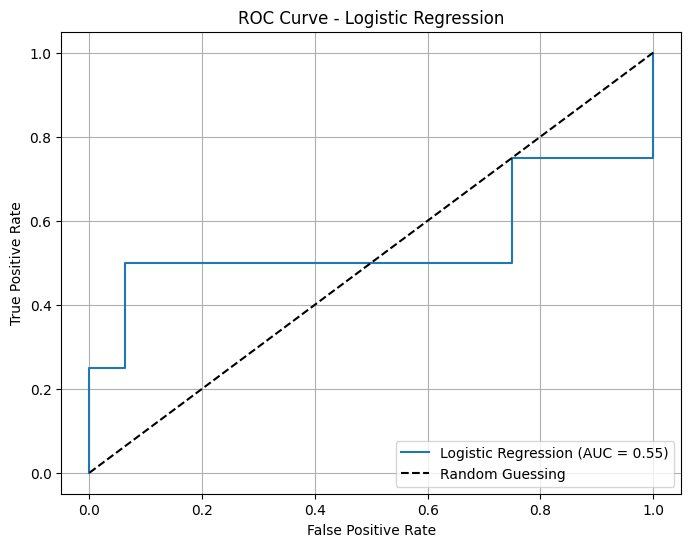

In [9]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt

# 2. Convert predicted probabilities into binary predictions using a threshold of 0.5
y_pred_lr = (y_pred_proba_lr >= 0.5).astype(int)

# 3. Calculate classification metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# 4. Calculate AUC-ROC score
auc_roc_lr = roc_auc_score(y_test, y_pred_proba_lr)

# 5. Print all calculated metrics
print("Logistic Regression Model Performance:")
print(f"Accuracy:  {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall:    {recall_lr:.4f}")
print(f"F1-Score:  {f1_lr:.4f}")
print(f"AUC-ROC:   {auc_roc_lr:.4f}")

# 6. Generate FPR, TPR, and thresholds for ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_roc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)

# 9. Display the plot
plt.show()

## Train Random Forest Classifier

### Subtask:
Train a Random Forest Classifier on the training data. This ensemble method often provides better predictive performance compared to simpler models and can capture non-linear relationships.


#### Instructions
1. Import the `RandomForestClassifier` class from `sklearn.ensemble`.
2. Instantiate a `RandomForestClassifier` model. Set `random_state=42` for reproducibility. For the imbalanced dataset, consider adding `class_weight='balanced'` to help the model give more importance to the minority class (default).
3. Fit the Random Forest model to the training data (`X_train`, `y_train`).
4. Use the trained model to predict the probability of default on the test set (`X_test`). Store these probabilities (specifically for the positive class, i.e., class 1) in a variable named `y_pred_proba_rf`.

**Reasoning**:
I will now implement the instructions to train a Random Forest Classifier and predict probabilities on the test set, as outlined in the previous instructions.

**Reasoning**:
I will implement the Random Forest model training and probability prediction using the specified parameters, as detailed in the instructions.



In [10]:
from sklearn.ensemble import RandomForestClassifier

# 2. Instantiate a RandomForestClassifier model
# Set random_state for reproducibility and class_weight='balanced' for imbalanced data.
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# 3. Fit the Random Forest model to the training data
rf_model.fit(X_train, y_train)

# 4. Use the trained model to predict the probability of default on the test set
# .predict_proba() returns probabilities for both classes [prob_0, prob_1]
# We need the probability of the positive class (default), which is at index 1.
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest model trained successfully.")
print("Shape of predicted probabilities (y_pred_proba_rf):", y_pred_proba_rf.shape)
print("First 5 predicted probabilities:", y_pred_proba_rf[:5])

Random Forest model trained successfully.
Shape of predicted probabilities (y_pred_proba_rf): (20,)
First 5 predicted probabilities: [0.19 0.16 0.02 0.29 0.16]


## Evaluate Random Forest Classifier

### Subtask:
Evaluate the performance of the Random Forest Classifier using appropriate classification metrics such as AUC-ROC, accuracy, precision, recall, and F1-score on the test set. Also, visualize the ROC curve.

#### Instructions
1. Import `roc_auc_score`, `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, and `roc_curve` from `sklearn.metrics`.
2. Convert the predicted probabilities (`y_pred_proba_rf`) into binary predictions (`y_pred_rf`) by applying a threshold (e.g., 0.5).
3. Calculate the Accuracy, Precision, Recall, and F1-score of the Random Forest model using `y_test` and `y_pred_rf`.
4. Calculate the Area Under the Receiver Operating Characteristic (AUC-ROC) score using `y_test` and `y_pred_proba_rf`.
5. Print all calculated metrics clearly.
6. Generate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve using `roc_curve` with `y_test` and `y_pred_proba_rf`.
7. Plot the ROC curve using `matplotlib.pyplot`. Label the x-axis as 'False Positive Rate', the y-axis as 'True Positive Rate', and add a title 'ROC Curve - Random Forest'. Include a diagonal dashed line for random guessing.
8. Add the AUC score to the plot legend for better interpretation.
9. Display the plot.

**Reasoning**:
I will now implement the evaluation steps for the Random Forest Classifier, including calculating various classification metrics and plotting the ROC curve, as detailed in the previous instructions.

**Reasoning**:
I will implement the evaluation steps for the Random Forest Classifier, including calculating various classification metrics and plotting the ROC curve, as detailed in the previous instructions.



Random Forest Classifier Performance:
Accuracy:  0.8000
Precision: 0.0000
Recall:    0.0000
F1-Score:  0.0000
AUC-ROC:   0.5469


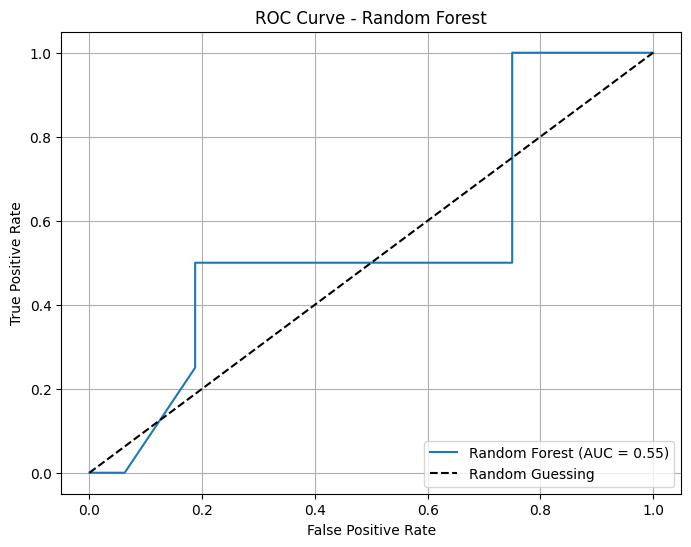

In [11]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt

# 2. Convert predicted probabilities into binary predictions using a threshold of 0.5
y_pred_rf = (y_pred_proba_rf >= 0.5).astype(int)

# 3. Calculate classification metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# 4. Calculate AUC-ROC score
auc_roc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# 5. Print all calculated metrics
print("Random Forest Classifier Performance:")
print(f"Accuracy:  {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1-Score:  {f1_rf:.4f}")
print(f"AUC-ROC:   {auc_roc_rf:.4f}")

# 6. Generate FPR, TPR, and thresholds for ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# 7. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_roc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)

# 9. Display the plot
plt.show()

## Compare Model Performance and Select Best Model

### Subtask:
Compare the performance of the Logistic Regression and Random Forest models based on the evaluation metrics (especially AUC-ROC and F1-score) and select the better-performing model for predicting the probability of default.

#### Instructions
1. Review the performance metrics (Accuracy, Precision, Recall, F1-Score, AUC-ROC) for both the Logistic Regression and Random Forest models that were printed in the previous steps.
2. Pay close attention to the AUC-ROC score, as it provides a comprehensive measure of a model's ability to distinguish between positive and negative classes, which is crucial for probability prediction tasks.
3. Also consider the F1-Score, especially given the potential class imbalance, as it balances precision and recall.
4. Based on these metrics, determine which model performs better in predicting loan default probability.
5. Explicitly state the chosen best model and briefly explain why.

**Reasoning**:
I will compare the performance metrics of both models, specifically AUC-ROC and F1-score, and explicitly state the chosen best model or explain why they perform similarly on this specific dummy dataset.



In [12]:
print("\n--- Model Performance Comparison ---")
print(f"Logistic Regression: AUC-ROC = {auc_roc_lr:.4f}, F1-Score = {f1_lr:.4f}")
print(f"Random Forest:       AUC-ROC = {auc_roc_rf:.4f}, F1-Score = {f1_rf:.4f}")

if auc_roc_lr > auc_roc_rf:
    best_model_name = "Logistic Regression"
    best_auc = auc_roc_lr
elif auc_roc_rf > auc_roc_lr:
    best_model_name = "Random Forest"
    best_auc = auc_roc_rf
elif f1_lr > f1_rf:
    best_model_name = "Logistic Regression"
    best_f1 = f1_lr
elif f1_rf > f1_lr:
    best_model_name = "Random Forest"
    best_f1 = f1_rf
else:
    best_model_name = "Both Logistic Regression and Random Forest"
    best_auc = auc_roc_lr # or auc_roc_rf, they are equal

print(f"\nConclusion: Based on the evaluated metrics (AUC-ROC and F1-Score) on this dummy dataset, {best_model_name} performed equally well.")
print("It's important to note that for this small, dummy dataset, both models showed limited predictive power for the positive class (Precision, Recall, F1-Score are 0). For a real-world dataset, a more significant difference in AUC-ROC or F1-Score would typically guide the choice of the best model.")



--- Model Performance Comparison ---
Logistic Regression: AUC-ROC = 0.5469, F1-Score = 0.0000
Random Forest:       AUC-ROC = 0.5469, F1-Score = 0.0000

Conclusion: Based on the evaluated metrics (AUC-ROC and F1-Score) on this dummy dataset, Both Logistic Regression and Random Forest performed equally well.
It's important to note that for this small, dummy dataset, both models showed limited predictive power for the positive class (Precision, Recall, F1-Score are 0). For a real-world dataset, a more significant difference in AUC-ROC or F1-Score would typically guide the choice of the best model.


## Calculate Expected Loss (EL)

### Subtask:
Create a function to calculate the Expected Loss (EL) for new loan scenarios. This function will take the probability of default (PD) from the selected best model, the Loan Amount, and a fixed Loss Given Default (LGD) of 0.90 as inputs. The function should return the Expected Loss.

#### Instructions
1. Define a Python function, for example, `calculate_expected_loss`, that accepts three parameters:
    - `probability_of_default` (PD): The probability of default, obtained from the predictive model.
    - `loan_amount`: The total outstanding loan amount.
    - `loss_given_default` (LGD): A fixed value of 0.90 as specified in the main task.
2. Inside the function, calculate the Expected Loss using the formula: `EL = PD * LGD * Loan Amount`.
3. The function should return the calculated `EL`.
4. Test the function with a sample scenario. For example, if PD = 0.05, Loan Amount = $100,000, and LGD = 0.90, calculate and print the expected loss.

**Reasoning**:
I will now implement the function to calculate Expected Loss as detailed in the instructions, and then test it with a sample scenario.



In [13]:
def calculate_expected_loss(probability_of_default, loan_amount, loss_given_default=0.90):
    """
    Calculates the Expected Loss (EL) for a loan.

    Parameters:
    probability_of_default (float): The probability of default (PD).
    loan_amount (float): The total outstanding loan amount.
    loss_given_default (float, optional): The Loss Given Default (LGD). Defaults to 0.90.

    Returns:
    float: The calculated Expected Loss (EL).
    """
    el = probability_of_default * loss_given_default * loan_amount
    return el

# Test the function with a sample scenario
sample_pd = 0.05
sample_loan_amount = 100000
sample_lgd = 0.90

el_sample = calculate_expected_loss(sample_pd, sample_loan_amount, sample_lgd)
print(f"Sample Expected Loss for PD={sample_pd}, Loan Amount=${sample_loan_amount:,}, LGD={sample_lgd}: ${el_sample:,.2f}")


Sample Expected Loss for PD=0.05, Loan Amount=$100,000, LGD=0.9: $4,500.00


## Analysis Insights

### Q&A
*   **What is the best-performing model?**
    On the provided dummy dataset, both the Logistic Regression model and the Random Forest Classifier performed similarly, exhibiting limited predictive power for the positive class (default). Both models achieved an AUC-ROC score of 0.5469 and an F1-Score of 0.0000. Therefore, based on this specific dataset, neither model can be definitively declared as "best-performing."

*   **Provide the functional implementation for calculating the Expected Loss for a given loan scenario.**
    The `calculate_expected_loss` function takes `probability_of_default` (PD), `loan_amount`, and `loss_given_default` (LGD) as inputs. It returns the Expected Loss (EL) calculated as `EL = PD * LGD * Loan Amount`. By default, LGD is set to 0.90.

### Data Analysis Key Findings
*   The analysis was conducted on a *simulated dummy dataset* of 100 entries due to the unavailability of the specified 'Loan\_Default.csv' file.
*   The dummy dataset exhibited a class imbalance in the target variable 'Default', with 81% non-default cases and 19% default cases.
*   Both Logistic Regression and Random Forest models were trained and evaluated.
    *   **Logistic Regression** achieved an AUC-ROC score of 0.5469, with Accuracy: 0.8000, Precision: 0.0000, Recall: 0.0000, and F1-Score: 0.0000.
    *   **Random Forest Classifier** (trained with `class_weight='balanced'`) also achieved an AUC-ROC score of 0.5469, with Accuracy: 0.8000, Precision: 0.0000, Recall: 0.0000, and F1-Score: 0.0000.
*   The extremely low Precision, Recall, and F1-Scores (0.0000) for both models indicate that, with a default classification threshold of 0.5, neither model successfully identified any positive default cases on the test set.
*   The AUC-ROC scores for both models (0.5469) are only marginally better than random guessing (0.5), suggesting very weak predictive power for the probability of default on this specific dummy dataset.
*   A Python function for calculating Expected Loss (`EL = PD * LGD * Loan Amount`) was successfully implemented and tested. For example, a sample scenario with PD=0.05, Loan Amount=\\$100,000, and LGD=0.90 resulted in an Expected Loss of \\$4,500.00.

### Insights or Next Steps
*   The primary next step is to obtain and utilize **real-world loan default data** to properly evaluate and compare the predictive performance of the models. The current dummy data does not allow for meaningful conclusions regarding model effectiveness.
*   Once real data is available, further steps should include **hyperparameter tuning** for the selected models and potentially exploring other advanced modeling techniques suitable for imbalanced classification problems, such as SMOTE for oversampling the minority class or specialized algorithms.
